In [1]:
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import Name_resolver

In [2]:
file_list = os.listdir('/data/passala/Coexpressolog_paper_data/Species_species_gene_tables')
locations = pd.read_csv('/data/passala/git/Coexpressalog_Method_Development/Cross_all_species/map_of_ortholog_map_locations.csv', index_col= 0)


In [3]:
def get_one_to_ones(Species_1 = 'rice',Species_2 = 'maize'):

    import pandas as pd
    import CococoNet_reader
    #Get Species Names in Common form 
    common_name_1 = Name_resolver.species_name_resolver(Species_1,'common')
    common_name_2 = Name_resolver.species_name_resolver(Species_2,'common')


    matrix_of_locations = pd.read_csv('/data/passala/git/Coexpressalog_Method_Development/Cross_all_species/map_of_ortholog_map_locations.csv', index_col= 0)#List of cross species maps
    current_location = matrix_of_locations[common_name_1][common_name_2] #get string for map
    
    cross_species_n_m_genes = pd.read_csv(current_location)

    ### Get one to ones
    cross_species_map_one_to_one = cross_species_n_m_genes.drop_duplicates(subset=common_name_1, keep= False,)
    cross_species_map_one_to_one = cross_species_map_one_to_one.drop_duplicates(subset= common_name_2, keep= False)
    return len(cross_species_map_one_to_one)


In [4]:
get_one_to_ones()

5471

In [5]:
species_list = locations.index.to_list()

In [6]:
species_list

['apple',
 'rice',
 'sorghum',
 'maize',
 'grape',
 'mustard',
 'soybean',
 'medicago',
 'tobacco',
 'potato',
 'arabidopsis',
 'brome',
 'tomato']

In [7]:
#species_list.pop(12)
#species_list.pop(11)

In [8]:
species_list

['apple',
 'rice',
 'sorghum',
 'maize',
 'grape',
 'mustard',
 'soybean',
 'medicago',
 'tobacco',
 'potato',
 'arabidopsis',
 'brome',
 'tomato']

In [9]:

combinations_to_calculate_pairwise = list(itertools.combinations(species_list,2))

In [10]:
pairwise_species_table = pd.DataFrame(data = combinations_to_calculate_pairwise, columns= ['Species 1','Species 2'])
pairwise_species_table

,Species 1,Species 2
0,apple,rice
1,apple,sorghum
2,apple,maize
3,apple,grape
4,apple,mustard
...,...,...
73,potato,brome
74,potato,tomato
75,arabidopsis,brome
76,arabidopsis,tomato


In [11]:
pairwise_species_table['Moderate Matches'] = 0 
pairwise_species_table['Stringent Matches'] = 0 
pairwise_species_table['Lenient Matches'] = 0 


In [12]:
pairwise_species_table

,Species 1,Species 2,Moderate Matches,Stringent Matches,Lenient Matches
0,apple,rice,0,0,0
1,apple,sorghum,0,0,0
2,apple,maize,0,0,0
3,apple,grape,0,0,0
4,apple,mustard,0,0,0
...,...,...,...,...,...
73,potato,brome,0,0,0
74,potato,tomato,0,0,0
75,arabidopsis,brome,0,0,0
76,arabidopsis,tomato,0,0,0


In [13]:
col_names = ['Moderate Matches','Stringent Matches','Lenient Matches']
level_names = ['moderate','lenient','stringent']

In [14]:
for row in pairwise_species_table.iterrows():
    species_1 = row[1][0]
    species_2 = row[1][1]
    for stringency,level in zip(col_names,level_names):
        
        spec_1_filter = [i for i in file_list if species_1 in i]
        spec_2_filter = [i for i in spec_1_filter if species_2 in i]
        final_file = [i for i in spec_2_filter if level in i]
        current_file = final_file[0]
        full_location = '/data/passala/Coexpressolog_paper_data/Species_species_gene_tables/'+current_file
        current_length = len(pd.read_csv(full_location))
        pairwise_species_table.loc[row[0],stringency] = current_length
    
        

In [15]:
pairwise_species_table

,Species 1,Species 2,Moderate Matches,Stringent Matches,Lenient Matches
0,apple,rice,3919,5803,2453
1,apple,sorghum,3645,4926,2493
2,apple,maize,4032,5533,2809
3,apple,grape,6128,7977,4534
4,apple,mustard,4375,6676,2876
...,...,...,...,...,...
73,potato,brome,3396,4641,2388
74,potato,tomato,9478,9922,8892
75,arabidopsis,brome,4966,6205,3875
76,arabidopsis,tomato,7977,9322,6679


In [16]:
pairwise_species_table['One to Ones'] = 0 

In [17]:
pairwise_species_table

,Species 1,Species 2,Moderate Matches,Stringent Matches,Lenient Matches,One to Ones
0,apple,rice,3919,5803,2453,0
1,apple,sorghum,3645,4926,2493,0
2,apple,maize,4032,5533,2809,0
3,apple,grape,6128,7977,4534,0
4,apple,mustard,4375,6676,2876,0
...,...,...,...,...,...,...
73,potato,brome,3396,4641,2388,0
74,potato,tomato,9478,9922,8892,0
75,arabidopsis,brome,4966,6205,3875,0
76,arabidopsis,tomato,7977,9322,6679,0


In [19]:
for row in pairwise_species_table.iterrows():
    species_1 = row[1][0]
    species_2 = row[1][1]
    current_length = get_one_to_ones(Species_1=species_1, Species_2 = species_2)
    pairwise_species_table.loc[row[0],'One to Ones'] = current_length

    
    

In [20]:
pairwise_species_table

,Species 1,Species 2,Moderate Matches,Stringent Matches,Lenient Matches,One to Ones
0,apple,rice,3919,5803,2453,2206
1,apple,sorghum,3645,4926,2493,1760
2,apple,maize,4032,5533,2809,1847
3,apple,grape,6128,7977,4534,3829
4,apple,mustard,4375,6676,2876,2380
...,...,...,...,...,...,...
73,potato,brome,3396,4641,2388,468
74,potato,tomato,9478,9922,8892,1157
75,arabidopsis,brome,4966,6205,3875,473
76,arabidopsis,tomato,7977,9322,6679,659


In [21]:
pairwise_species_table['Added Pairs']= pairwise_species_table['Moderate Matches']-pairwise_species_table['One to Ones']
pairwise_species_table

,Species 1,Species 2,Moderate Matches,Stringent Matches,Lenient Matches,One to Ones,Added Pairs
0,apple,rice,3919,5803,2453,2206,1713
1,apple,sorghum,3645,4926,2493,1760,1885
2,apple,maize,4032,5533,2809,1847,2185
3,apple,grape,6128,7977,4534,3829,2299
4,apple,mustard,4375,6676,2876,2380,1995
...,...,...,...,...,...,...,...
73,potato,brome,3396,4641,2388,468,2928
74,potato,tomato,9478,9922,8892,1157,8321
75,arabidopsis,brome,4966,6205,3875,473,4493
76,arabidopsis,tomato,7977,9322,6679,659,7318


In [22]:
pairwise_species_table.mean()

/tmp/ipykernel_1518068/17569851.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pairwise_species_table.mean()


Moderate Matches     5056.179487
Stringent Matches    6611.371795
Lenient Matches      3755.666667
One to Ones          2183.166667
Added Pairs          2873.012821
dtype: float64

In [16]:
moderate_table = pairwise_species_table[['Species 1','Species 2','Moderate Matches']]
moderate_table

,Species 1,Species 2,Moderate Matches
0,apple,rice,3919
1,apple,sorghum,3645
2,apple,maize,4032
3,apple,grape,6128
4,apple,mustard,4375
...,...,...,...
73,potato,brome,3396
74,potato,tomato,9478
75,arabidopsis,brome,4966
76,arabidopsis,tomato,7977


In [17]:
capitalized_list = [x.capitalize() for x in species_list]

In [18]:
moderate_results = pd.DataFrame(columns = capitalized_list, index = capitalized_list, data = 0)

In [19]:
moderate_table.head()

,Species 1,Species 2,Moderate Matches
0,apple,rice,3919
1,apple,sorghum,3645
2,apple,maize,4032
3,apple,grape,6128
4,apple,mustard,4375


In [20]:
moderate_table['Species 1'] = moderate_table['Species 1'].str.capitalize()
moderate_table['Species 2'] = moderate_table['Species 2'].str.capitalize()

/tmp/ipykernel_605968/1705543407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderate_table['Species 1'] = moderate_table['Species 1'].str.capitalize()
/tmp/ipykernel_605968/1705543407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderate_table['Species 2'] = moderate_table['Species 2'].str.capitalize()


In [21]:
moderate_results

,Apple,Rice,Sorghum,Maize,Grape,Mustard,Soybean,Medicago,Tobacco,Potato,Arabidopsis,Brome,Tomato
Apple,0,0,0,0,0,0,0,0,0,0,0,0,0
Rice,0,0,0,0,0,0,0,0,0,0,0,0,0
Sorghum,0,0,0,0,0,0,0,0,0,0,0,0,0
Maize,0,0,0,0,0,0,0,0,0,0,0,0,0
Grape,0,0,0,0,0,0,0,0,0,0,0,0,0
Mustard,0,0,0,0,0,0,0,0,0,0,0,0,0
Soybean,0,0,0,0,0,0,0,0,0,0,0,0,0
Medicago,0,0,0,0,0,0,0,0,0,0,0,0,0
Tobacco,0,0,0,0,0,0,0,0,0,0,0,0,0
Potato,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
z = moderate_table.pivot('Species 1', 'Species 2', 'Moderate Matches')
moderate_final = moderate_results.add(z, fill_value=0).add(z.T, fill_value=0)

/tmp/ipykernel_605968/2902990570.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  z = moderate_table.pivot('Species 1', 'Species 2', 'Moderate Matches')


In [23]:
import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

In [24]:
moderate_table.mean()

/tmp/ipykernel_605968/522245325.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  moderate_table.mean()


Moderate Matches    5056.179487
dtype: float64

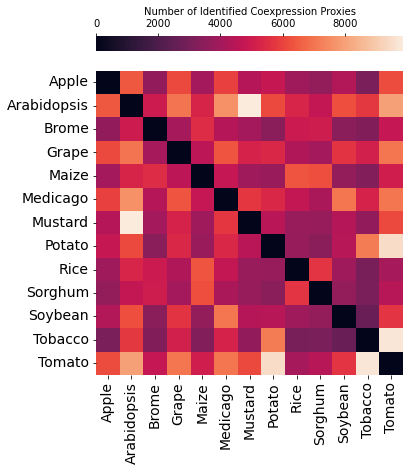

In [27]:
fig, ax = plt.subplots(figsize=(5.5,7))
sns.heatmap(data = moderate_final,cbar_kws={'label': 'Number of Identified Coexpression Proxies','location':'top',})
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)

#plt.title('Number of Coexpression Proxies', fontsize = 20)
plt.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/heatmap_all_species_and_tomato_with_brome.svg')



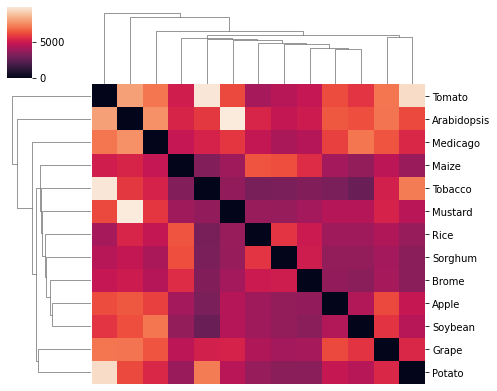

In [28]:
fig = sns.clustermap(moderate_final, metric = 'euclidean', figsize= (7,5.5),xticklabels = False,)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)

In [20]:
Stringent_table = pairwise_species_table[['Species 1','Species 2','Stringent Matches']]
Stringent_results = pd.DataFrame(columns = species_list, index = species_list, data = 0)
z = Stringent_table.pivot('Species 1', 'Species 2', 'Stringent Matches')
Stringent_final = Stringent_results.add(z, fill_value=0).add(z.T, fill_value=0)

/tmp/ipykernel_2209021/629082557.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  z = Stringent_table.pivot('Species 1', 'Species 2', 'Stringent Matches')


Text(0.5, 1.0, 'Stringent Threshold')

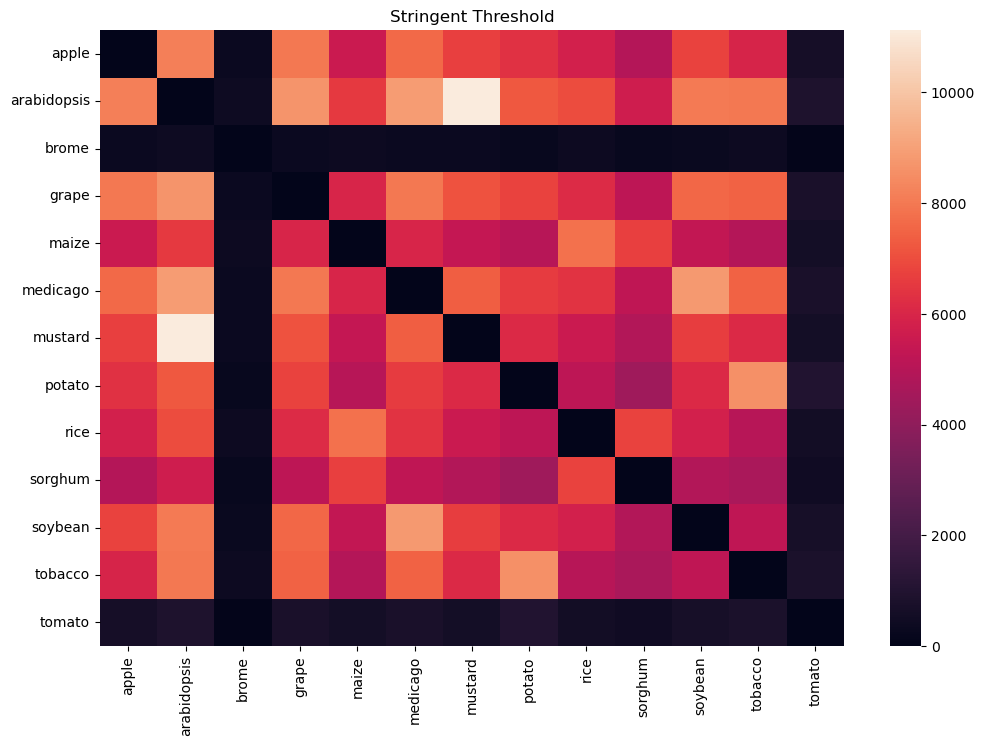

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data = Stringent_final)
plt.title('Stringent Threshold')

In [22]:
Lenient_table = pairwise_species_table[['Species 1','Species 2','Lenient Matches']]
Lenient_results = pd.DataFrame(columns = species_list, index = species_list, data = 0)
z = Lenient_table.pivot('Species 1', 'Species 2', 'Lenient Matches')
Lenient_final = Lenient_results.add(z, fill_value=0).add(z.T, fill_value=0)

/tmp/ipykernel_2209021/1682090610.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  z = Lenient_table.pivot('Species 1', 'Species 2', 'Lenient Matches')


Text(0.5, 1.0, 'Lenient Threshold')

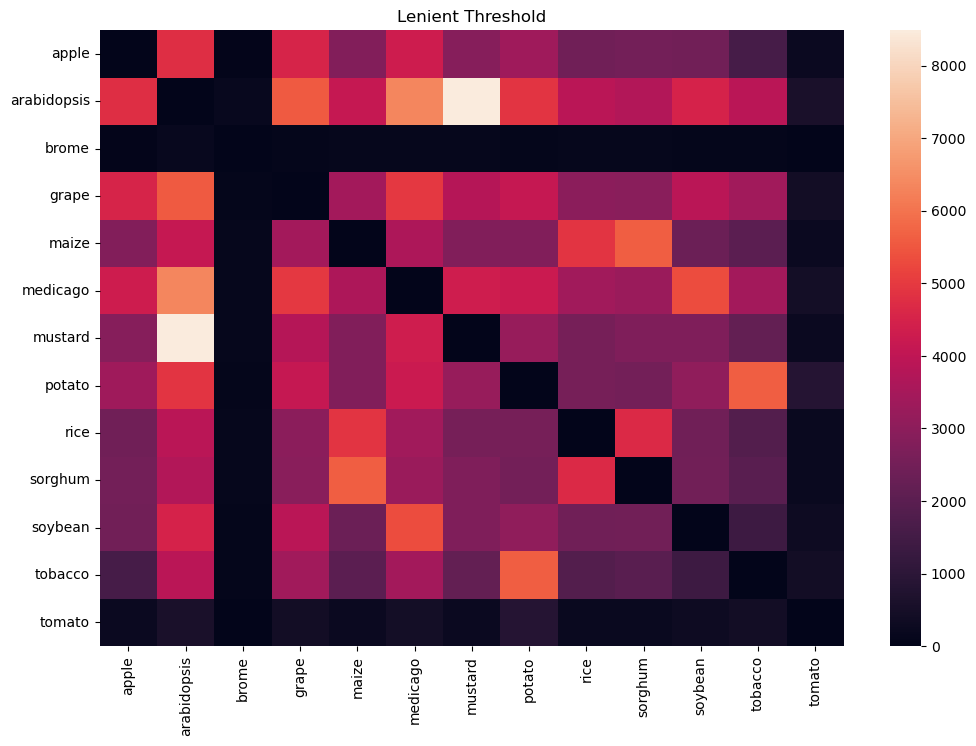

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data = Lenient_final)
plt.title('Lenient Threshold')